<a href="https://colab.research.google.com/github/EdisonHon/numpy-matplotlib-Mini-Project/blob/main/numpy_matplotlib_Edison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1 to 3: Follow the tutorial

In [2]:
import numpy as np
import sys
import datetime

In [3]:
# Function that counts how many random points fall inside the unit circle
def inside_circle(total_count):
    # Generate random x and y values between 0 and 1
    x = np.random.uniform(size=total_count)
    y = np.random.uniform(size=total_count)
    # Compute the distance from origin
    radii = np.sqrt(x**2 + y**2)
    # Count how many points have distance <= 1
    count = len(radii[np.where(radii <= 1.0)])
    return count

In [4]:
def main():
    n_samples = 10000
    # Record the start time
    start_time = datetime.datetime.now()
    # Compute estimated value of π
    counts = inside_circle(n_samples)
    my_pi = 4.0 * counts / n_samples
    # Record the end time
    end_time = datetime.datetime.now()
    # Compute time (in seconds)
    elapsed_time = (end_time - start_time).total_seconds()
    # Estimate memory used
    size_of_float = np.dtype(np.float64).itemsize
    memory_required = 3 * n_samples * size_of_float / (1024**3)
    # Print results
    print("Pi: {}, memory: {} GiB, time: {} s".format(my_pi, memory_required, elapsed_time))

if __name__ == '__main__':
    main()

Pi: 3.1584, memory: 0.00022351741790771484 GiB, time: 0.033928 s


Step 4 to 5

In [11]:
import math

# List to hold all results: [N, π estimate, relative error, memory used, time]
results = []
# Loop over sample sizes: 10^2 to 10^8
sample_sizes = [10**i for i in range(2, 9)]

for n_samples in sample_sizes:
    # Record the start time
    start_time = datetime.datetime.now()

    # Compute estimated value of π
    counts = inside_circle(n_samples)
    my_pi = 4.0 * counts / n_samples

    # Record the end time
    end_time = datetime.datetime.now()

    # Compute time (in seconds)
    elapsed_time = (end_time - start_time).total_seconds()

    # Estimate memory used
    size_of_float = np.dtype(np.float64).itemsize
    memory_required = 3 * n_samples * size_of_float / (1024**3)

    # Compute relative error using math.pi
    relative_error = abs(my_pi - math.pi) / math.pi

    # Print the results for this sample size
    print(f"N = {n_samples}, π = {my_pi:.6f}, error = {relative_error:.2e}, memory = {memory_required:.3f} GiB, time = {elapsed_time:.3f}s")

    # Store the results in a list
    results.append([n_samples, my_pi, relative_error, memory_required, elapsed_time])


N = 100, π = 3.160000, error = 5.86e-03, memory = 0.000 GiB, time = 0.001s
N = 1000, π = 3.184000, error = 1.35e-02, memory = 0.000 GiB, time = 0.001s
N = 10000, π = 3.114800, error = 8.53e-03, memory = 0.000 GiB, time = 0.001s
N = 100000, π = 3.139200, error = 7.62e-04, memory = 0.002 GiB, time = 0.007s
N = 1000000, π = 3.141136, error = 1.45e-04, memory = 0.022 GiB, time = 0.059s
N = 10000000, π = 3.141854, error = 8.33e-05, memory = 0.224 GiB, time = 0.610s
N = 100000000, π = 3.141713, error = 3.83e-05, memory = 2.235 GiB, time = 6.961s


In [12]:
# Output to a .csv file
import csv

with open('pi_results.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['N', 'Estimated_Pi', 'Relative_Error', 'Memory_GiB', 'Time_Seconds'])
    for row in results:
        writer.writerow(row)


Step 6

In [13]:
# Load the CSV back into the notebook
data = np.loadtxt('pi_results.csv', delimiter=',', skiprows=1)

# Extract columns
N_vals = data[:, 0]
pi_vals = data[:, 1]
error_vals = data[:, 2]
memory_vals = data[:, 3]
time_vals = data[:, 4]


In [14]:
import matplotlib.pyplot as plt

# Convert to log10 scale
log_N = np.log10(N_vals)
log_error = np.log10(error_vals)
log_memory = np.log10(memory_vals)
log_time = np.log10(time_vals)

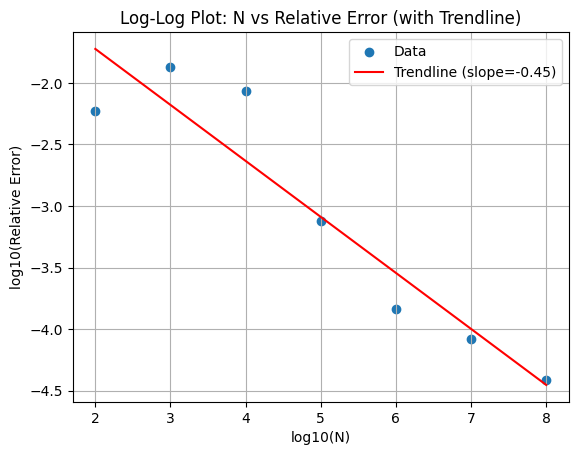

In [18]:
# Plot: N vs Relative Error

# Fit a linear model: log_error = slope * log_N + intercept
z_error = np.polyfit(log_N, log_error, 1)      # z[0] = slope, z[1] = intercept
p_error = np.poly1d(z_error)

# Plot with trendline
plt.figure()
plt.scatter(log_N, log_error, label='Data')
plt.plot(log_N, p_error(log_N), color='red', label=f'Trendline (slope={z_error[0]:.2f})')
plt.title('Log-Log Plot: N vs Relative Error (with Trendline)')
plt.xlabel('log10(N)')
plt.ylabel('log10(Relative Error)')
plt.legend()
plt.grid(True)
plt.show()

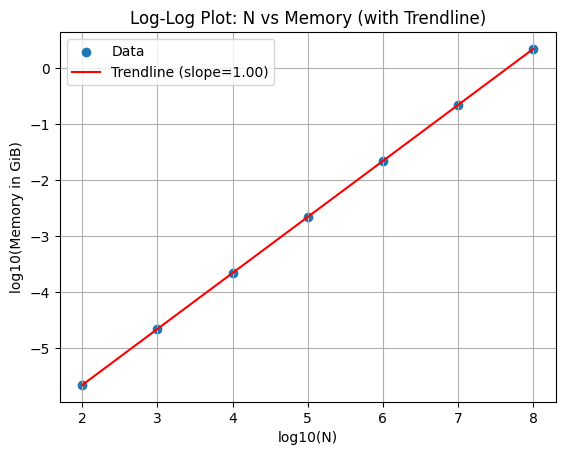

In [19]:
# Plot: N vs Memory

# Fit a linear model: log_error = slope * log_N + intercept
z_mem = np.polyfit(log_N, log_memory, 1)
p_mem = np.poly1d(z_mem)

# Plot with trendline
plt.figure()
plt.scatter(log_N, log_memory, label='Data')
plt.plot(log_N, p_mem(log_N), color='red', label=f'Trendline (slope={z_mem[0]:.2f})')
plt.title('Log-Log Plot: N vs Memory (with Trendline)')
plt.xlabel('log10(N)')
plt.ylabel('log10(Memory in GiB)')
plt.legend()
plt.grid(True)
plt.show()

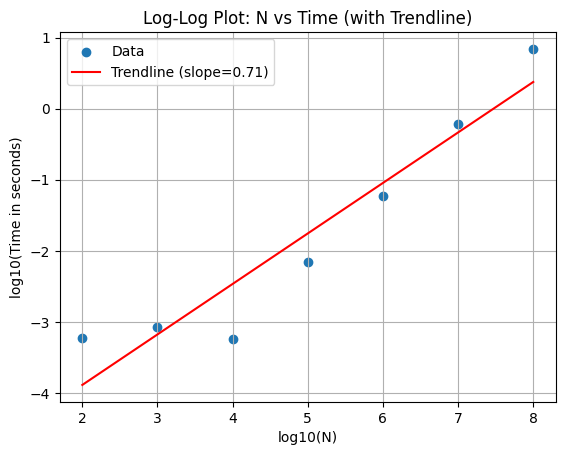

In [20]:
# Plot: N vs Time

# Fit a linear model: log_error = slope * log_N + intercept
z_time = np.polyfit(log_N, log_time, 1)
p_time = np.poly1d(z_time)

# Plot with trendline
plt.figure()
plt.scatter(log_N, log_time, label='Data')
plt.plot(log_N, p_time(log_N), color='red', label=f'Trendline (slope={z_time[0]:.2f})')
plt.title('Log-Log Plot: N vs Time (with Trendline)')
plt.xlabel('log10(N)')
plt.ylabel('log10(Time in seconds)')
plt.legend()
plt.grid(True)
plt.show()

Step 7

### Step 7: Analysis of π Simulation Results

**a. Accuracy of π estimate with increasing N:**

As the number of samples \(N\) increases, the relative error in estimating π generally decreases. However, the decrease in error is not exactly by a factor of 10 when \(N\) increases by a factor of 10. Instead, the error decreases approximately in proportion to \(1/\sqrt{N}\), which is typical for Monte Carlo simulations. This trend is visible in the log-log plot, where the slope of the N vs. Error curve is close to -0.5, indicating sub-linear improvement in accuracy.

---

**b. Memory scaling with increasing N:**

The amount of memory used increases linearly with \(N\), because the simulation stores three arrays (x, y, and radii), each with \(N\) floating-point values. In the log-log plot of N vs. Memory, the points form a straight line with a slope close to 1. This confirms that memory usage scales linearly with the number of samples \(N\).

---

**c. Time scaling with increasing N:**

The computation time also increases approximately linearly with \(N\), as more samples take proportionally more time to generate and process. In the log-log plot of N vs. Time, the trendline appears as a straight line with a slope close to 1, suggesting that time complexity is linear with respect to \(N\).
